# BIOS512 Assignment #2

📚 import the `TidyVerse` package. 📚

In [1]:
library('tidyverse') 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Uncomment the code below and execute the following cell. This code provides a table for us called `ncaa_sports_spending`.

In [3]:
data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-03-29/sports.csv'

ncaa_sports_spending = read_csv(data_url, col_types = cols()) |> 
     filter(sports == 'Basketball') |>
     pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
     select(year, institution_name, men_or_women, expenditure_usd) |>
     mutate(men_or_women = str_replace(men_or_women, 'exp_', ''))

ncaa_sports_spending |> head()

year,institution_name,men_or_women,expenditure_usd
<dbl>,<chr>,<chr>,<dbl>
2015,Alabama A & M University,men,817868
2015,Alabama A & M University,women,742460
2015,University of Alabama at Birmingham,men,4189826
2015,University of Alabama at Birmingham,women,1962579
2015,University of Alabama in Huntsville,men,612569
2015,University of Alabama in Huntsville,women,386007


**Compare the spending on men's versus women's basketball over time using a bar chart.**

Either use an *encoding* or *facet* to plot separate bars for men and women.

(**Hint** add the argument `weight = expenditure_usd` when you use `geom_bar` so the bar height reflects spending.)

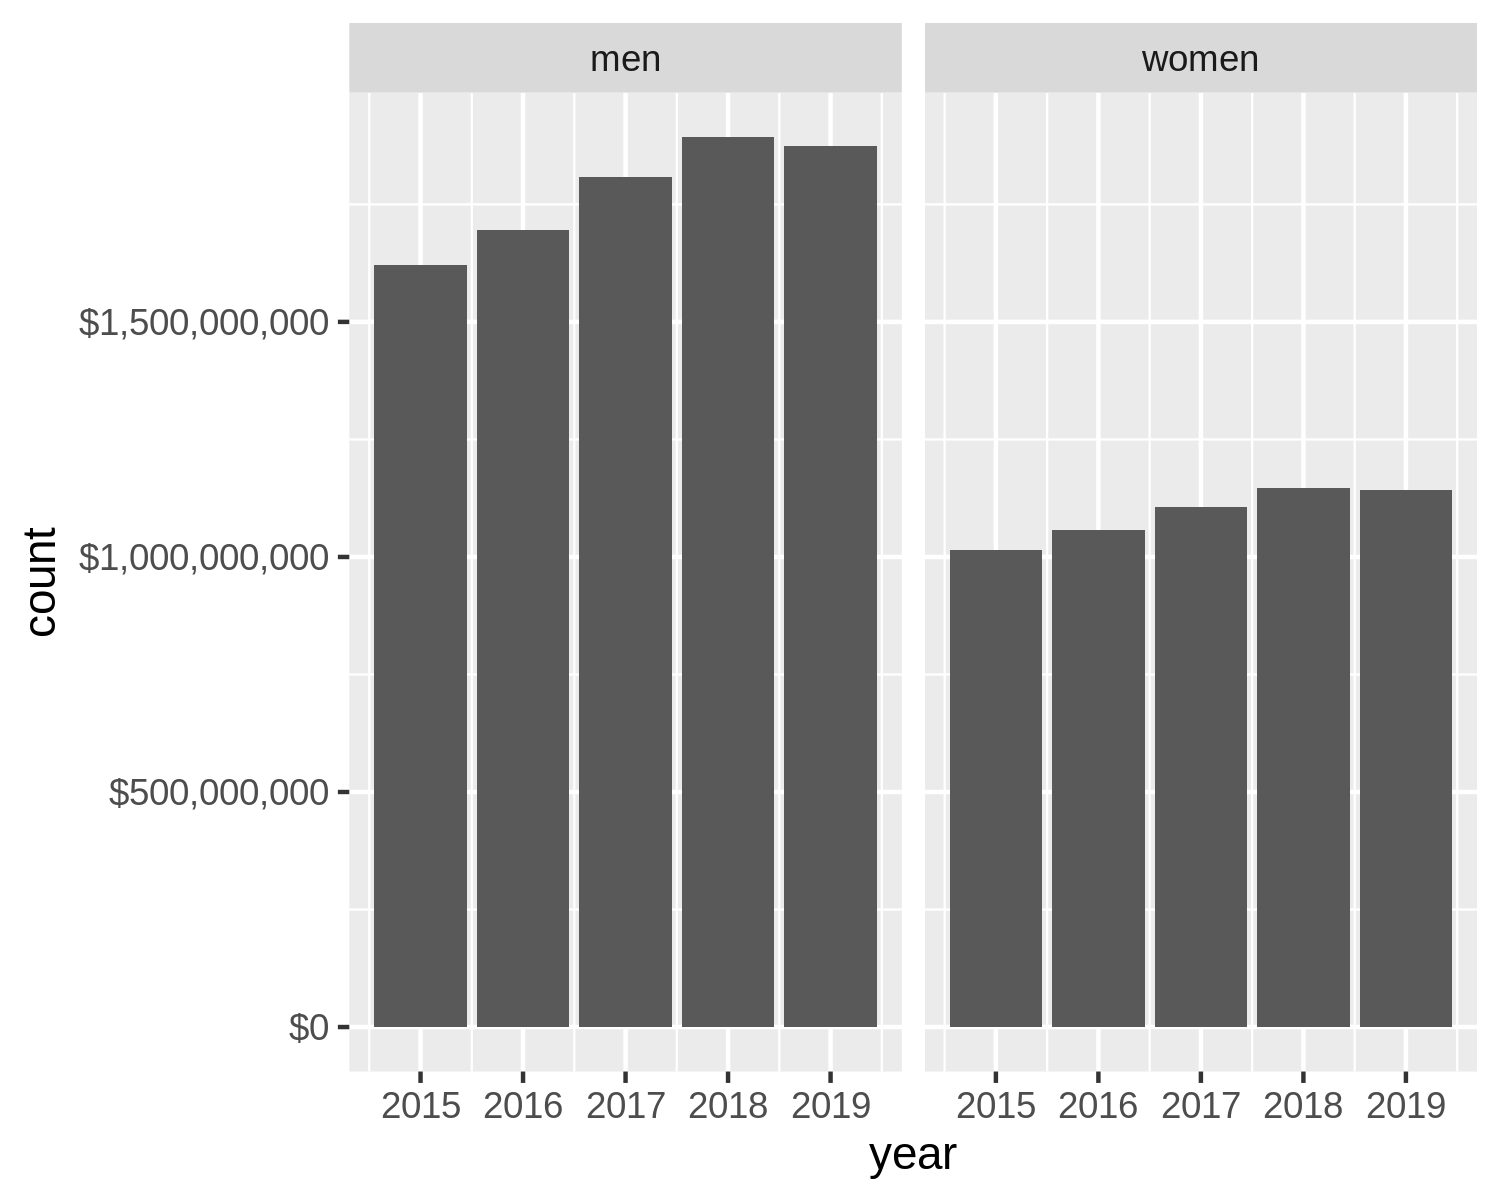

In [12]:
# bar chart code goes here
p = ggplot(ncaa_sports_spending, aes(x = year, weight = expenditure_usd)) +
           geom_bar() +
           facet_wrap(~men_or_women) + 
           scale_y_continuous(labels = scales::dollar_format())
p


You can find my solution [here](https://raw.githubusercontent.com/chuckpr/BIOS512/main/assignments/sports_spendig_chart.png). **Your chart does not need to look exactly like mine!** You may arrive at a different solution 🙂. 

To get the dollar signs in the axis labels I added this adujustment to my chart:

```r
scale_y_continuous(labels = scales::dollar_format())
```

Uncomment and execute the code below to get a table for just UNC sports spending in 2019 called `unc_sports_spending_2019`.

In [14]:
unc_sports_spending_2019 = read_csv(data_url, col_types = cols()) |> 
     filter(institution_name == 'University of North Carolina at Chapel Hill', year == 2019) |>
     mutate(sports = fct_reorder(sports, exp_women)) |>
     pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
     select(year, institution_name, sports, men_or_women, expenditure_usd) |>
     mutate(men_or_women = str_replace(men_or_women, 'exp_', '')) |>
     filter(!is.na(expenditure_usd))

Make a bar chart that compares spending across all sports for men versus women at UNC in 2019.

In [15]:
unc_sports_spending_2019 |> head() 

year,institution_name,sports,men_or_women,expenditure_usd
<dbl>,<chr>,<fct>,<chr>,<dbl>
2019,University of North Carolina at Chapel Hill,Baseball,men,3056674
2019,University of North Carolina at Chapel Hill,Basketball,men,9156512
2019,University of North Carolina at Chapel Hill,Basketball,women,3867351
2019,University of North Carolina at Chapel Hill,All Track Combined,men,1341780
2019,University of North Carolina at Chapel Hill,All Track Combined,women,1808446
2019,University of North Carolina at Chapel Hill,Fencing,men,213847


In [ ]:
#I think I need to do something like this in order to filter the data to only show 2019, but I'm not quite sure if this is right? 
# In Stata you can browse to see the entire data set - is there a way to do this in R?  

In [25]:
unc_sports_spending_2019 %>% filter(year == 2019) 

year,institution_name,sports,men_or_women,expenditure_usd
<dbl>,<chr>,<fct>,<chr>,<dbl>
2019,University of North Carolina at Chapel Hill,Baseball,men,3056674
2019,University of North Carolina at Chapel Hill,Basketball,men,9156512
2019,University of North Carolina at Chapel Hill,Basketball,women,3867351
2019,University of North Carolina at Chapel Hill,All Track Combined,men,1341780
2019,University of North Carolina at Chapel Hill,All Track Combined,women,1808446
2019,University of North Carolina at Chapel Hill,Fencing,men,213847
2019,University of North Carolina at Chapel Hill,Fencing,women,212291
2019,University of North Carolina at Chapel Hill,Field Hockey,women,1677307
2019,University of North Carolina at Chapel Hill,Football,men,30541821


ERROR while rich displaying an object: Error: Discrete value supplied to continuous scale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(cap

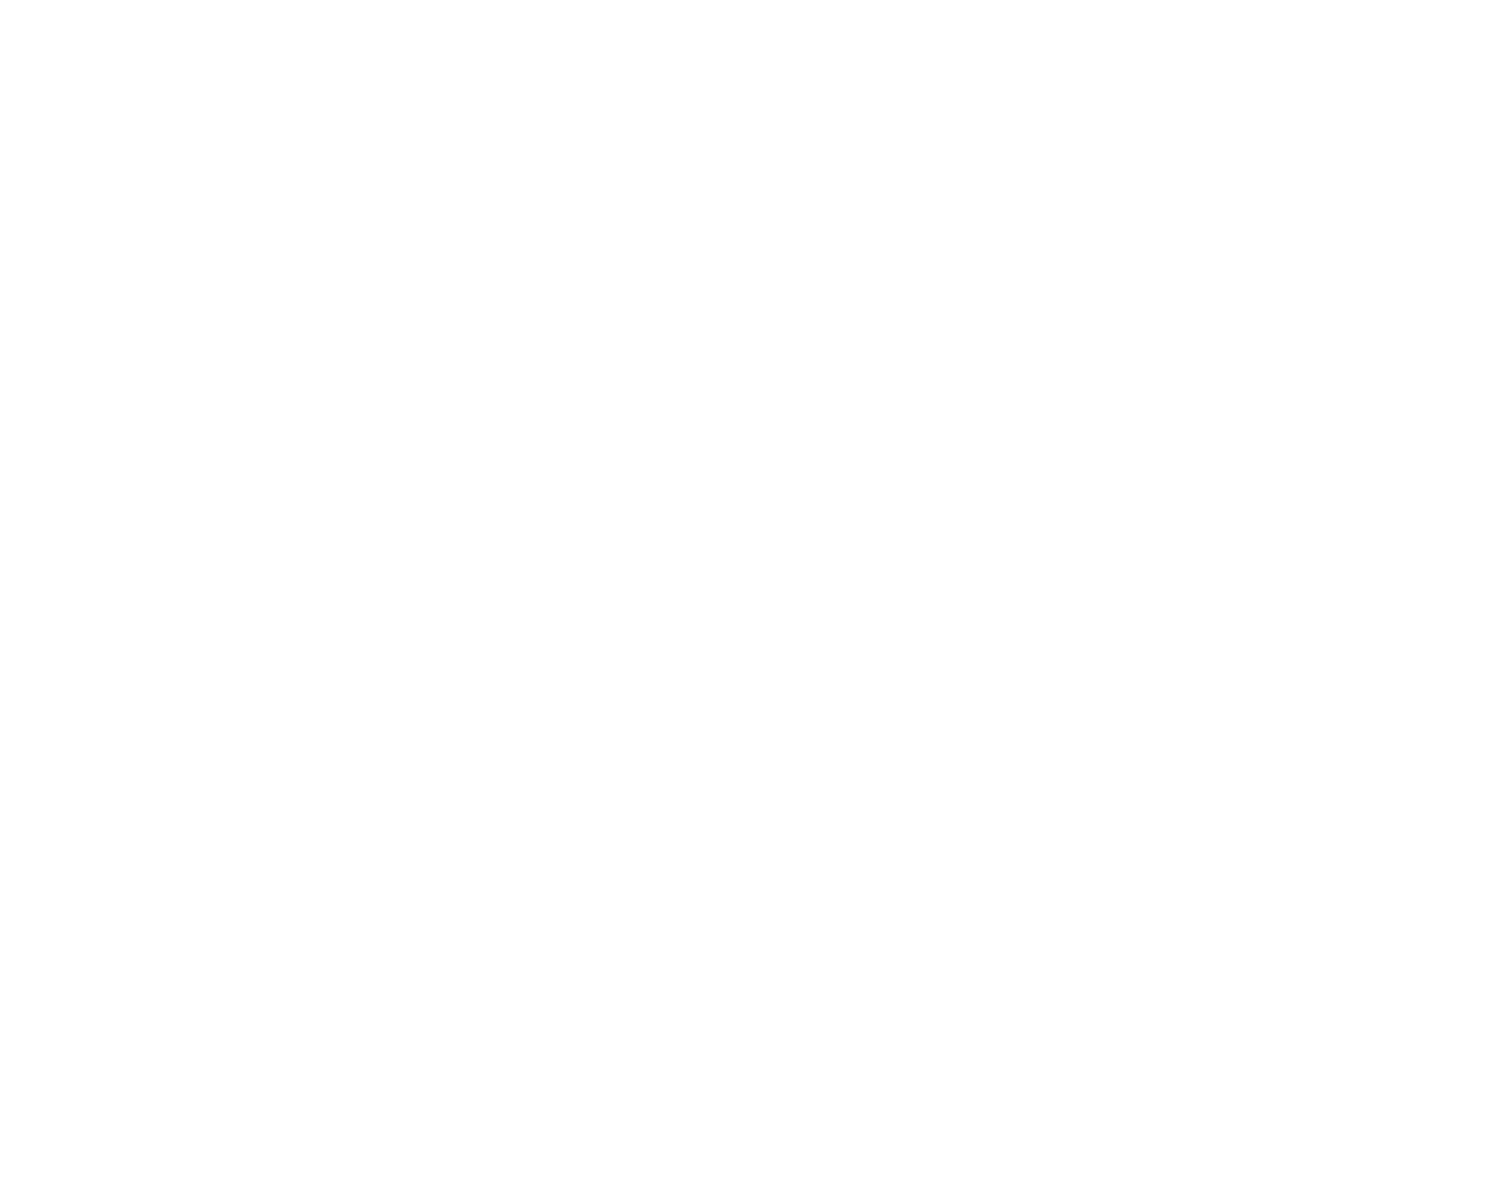

In [31]:
# bar chart code goes here
p = ggplot(unc_sports_spending_2019, aes(x = sports, weight = expenditure_usd / 1e6)) +
           geom_bar() +
           facet_wrap(~men_or_women) + 
           scale_y_continuous(labels = scales::dollar_format()) + 
           #scale_x_continuous(labels = scales::dollar_format(suffix = 'M')) + labs(x = 'Spending') +
           coord_flip()
p

You can find my solution [here](https://raw.githubusercontent.com/chuckpr/BIOS512/main/assignments/unc_sports_spending.png). **Your chart does not need to look like mine!**

To get the fancy dollar labels I had to do a couple things:

First my `weight` encoding was like this:
```r
weight = expenditure_usd / 1e6
```

Second, I added this to my chart adjust how my axis labels were presented:
```r
scale_x_continuous(labels = scales::dollar_format(suffix = 'M')) + labs(x = 'Spending')
```

**BONUS** 
Can you make sense of the code above? What does the `labs` function do for instance?

I commented out the X label row, because when I try to run this I get an error: "Discrete value supplied to continuous scale". I assume the continuous scale is the spending, but what is the discrete value? 

In the code above, the scale_x_continuous says that the x axis is a continuous variable. The next part of the function tells it to format the numbers as dollars, with an "M" to indicate millions of dollars. The "labs" function defines the label for the x axis. 